In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

loss_history = []


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    gradient = (1 / m) * X.T.dot(h - y)
    return gradient


def compute_hessian(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    hessian = (1 / m) * X.T @ np.diag(h) @ np.diag(1 - h) @ X
    return hessian


def compute_loss(y, y_pred):
    return np.mean(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred))


def newtons_method(X, y, epochs=100):
    m, n = X.shape
    theta = np.zeros(n)
    for _ in range(epochs):
        gradient = compute_gradient(X, y, theta)
        hessian = compute_hessian(X, y, theta)
        theta = theta - np.linalg.inv(hessian).dot(gradient)
        y_pred = sigmoid(X.dot(theta))
        loss = compute_loss(y, y_pred)
        loss_history.append(loss)

    return theta


In [31]:


data = pd.read_excel("data/breast_cancer_wisconsin.xlsx",index_col=0)
data.head()
#Class列为标签列，2为良性，4为恶性,将标签列转换为0，1
data["Class"] = (data["Class"] / 2 - 1).astype(int)

plt.show()
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)
x_train = train.iloc[:, [1, 2]].values
y_train = train["Class"].values
x_test = test.iloc[:, [1, 2]].values
y_test = test["Class"].values

array([[1, 1],
       [2, 2],
       [1, 2],
       ...,
       [2, 2],
       [1, 1],
       [1, 1]], dtype=int64)

In [32]:
#添加一列1
X_train = np.hstack([np.ones((len(x_train), 1)), x_train])
X_test = np.hstack([np.ones((len(x_test), 1)), x_test])
theta = newtons_method(X_train, y_train, epochs=6)
print(theta)

[-5.58137234  0.93942339  0.69318334]


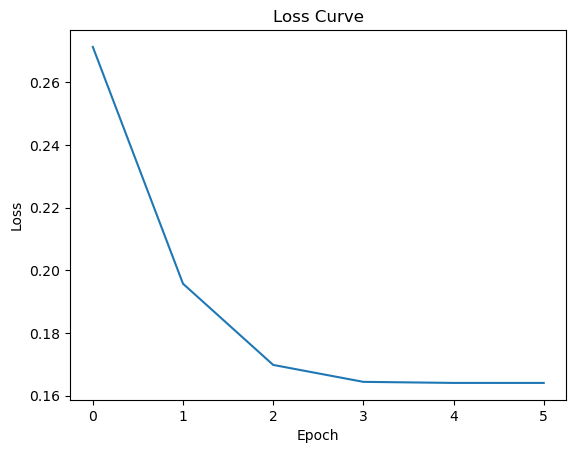

In [33]:
#绘制损失函数
plt.plot(loss_history)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
